In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv("/Users/sabarish/Desktop/Validation_Metrics/UCI_Credit_Card.csv")
df = df.rename(columns={"default.payment.next.month": "default"})
df = df.drop(columns=["ID"])

X = df.drop(columns=["default"])
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Overall accuracy:", accuracy_score(y_test, y_pred))


Overall accuracy: 0.8076666666666666


In [19]:
test_df = X.copy()
test_df["true"] = y
test_df["pred"] = model.predict(scaler.transform(X))

test_df["credit_group"] = pd.qcut(
    test_df["LIMIT_BAL"], q=4, labels=["Low", "Mid-Low", "Mid-High", "High"]
)

group_acc = test_df.groupby("credit_group").apply(
    lambda x: (x["true"] == x["pred"]).mean()
)

print(group_acc)


credit_group
Low         0.738927
Mid-Low     0.796690
Mid-High    0.845610
High        0.867270
dtype: float64


/var/folders/n_/rqkhqk956b50g0mm3_5l4fzm0000gn/T/ipykernel_2392/2634758008.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_acc = test_df.groupby("credit_group").apply(
/var/folders/n_/rqkhqk956b50g0mm3_5l4fzm0000gn/T/ipykernel_2392/2634758008.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_acc = test_df.groupby("credit_group").apply(


In [20]:
test_df["age_group"] = pd.cut(
    test_df["AGE"],
    bins=[20, 30, 40, 50, 100],
    labels=["20–30", "30–40", "40–50", "50+"]
)

age_acc = test_df.groupby("age_group").apply(
    lambda x: (x["true"] == x["pred"]).mean()
)

print(age_acc)


age_group
20–30    0.806683
30–40    0.822459
40–50    0.808493
50+      0.784487
dtype: float64


/var/folders/n_/rqkhqk956b50g0mm3_5l4fzm0000gn/T/ipykernel_2392/99328638.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_acc = test_df.groupby("age_group").apply(
/var/folders/n_/rqkhqk956b50g0mm3_5l4fzm0000gn/T/ipykernel_2392/99328638.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age_acc = test_df.groupby("age_group").apply(


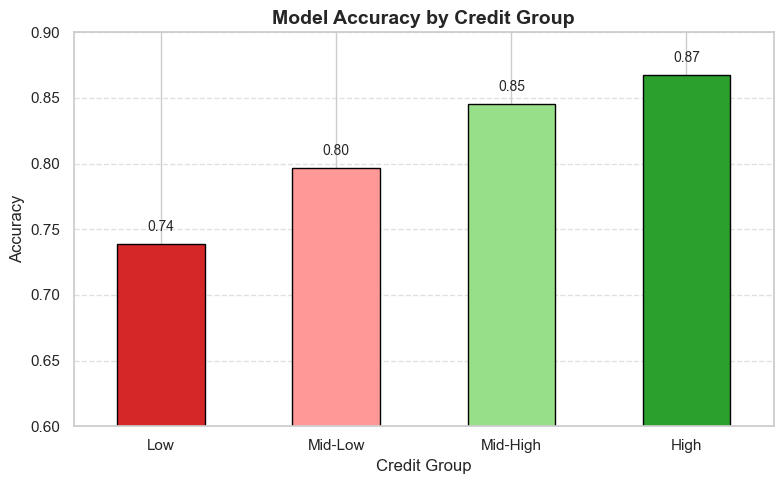

In [ ]:
colors = ["#D62728", "#FF9896", "#98DF8A", "#2CA02C"]

plt.figure(figsize=(8, 5))

group_acc.plot(
    kind="bar",
    color=colors,
    edgecolor="black"
)

plt.title("Model Accuracy by Credit Group", fontsize=14, weight="bold")
plt.xlabel("Credit Group", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.6, 0.9)

for i, value in enumerate(group_acc.values):
    plt.text(i, value + 0.01, f"{value:.2f}", ha="center", fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()
